In [15]:
install.packages("plot3D")
install.packages("car", repos = "http://R-Forge.R-project.org")
install.packages("rgl")

# Modelos de regresión lineal

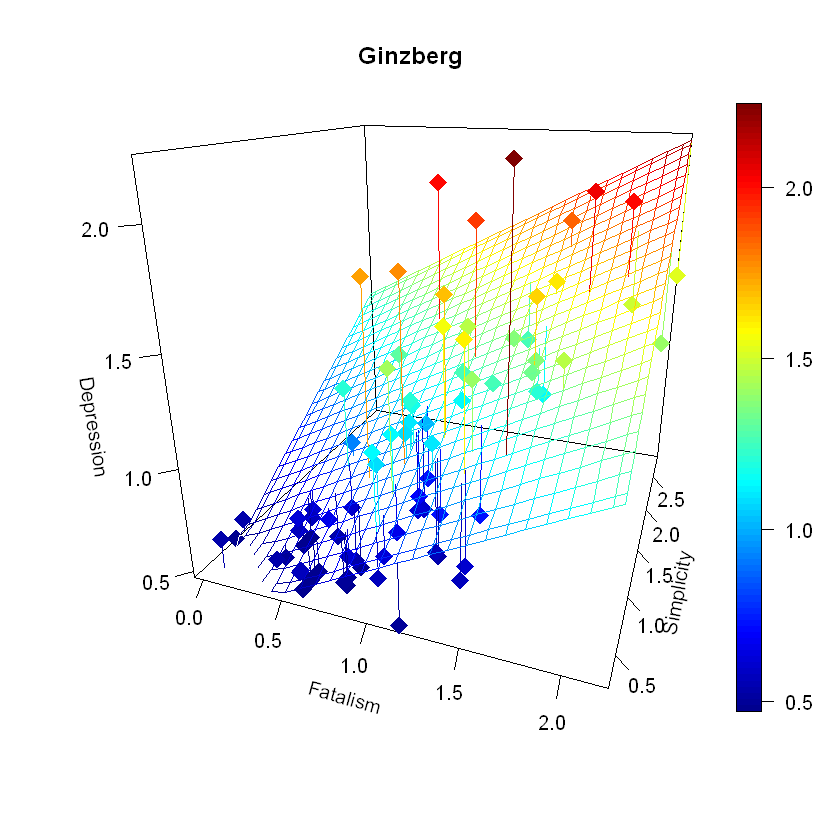

In [2]:
library("carData")
library("plot3D")

# Datos

x <- Ginzberg$fatalism
y <- Ginzberg$simplicity
z <- Ginzberg$depression

# Modelo ajustado ( z = (ax + by + d) / d)
# lm obtiene el modelo lineal ax + by + cz + d = 0

fit <- lm(z ~ x + y)

# Predicción

grid_lines <- 26
x_pred <- seq(min(x), max(x), length.out = grid_lines)
y_pred <- seq(min(y), max(y), length.out = grid_lines)
# Genera una maya de datos x y y para predecir z
xy <- expand.grid(x = x_pred, y = y_pred)
z_pred <- matrix(predict(fit, newdata = xy),
                 nrow = grid_lines, ncol = grid_lines)

# Puntos ajustados
fitpoints <- predict(fit)

# Visualización
scatter3D(x, y, z, pch = 18, cex = 2,
          theta = 20, phi = 20, ticktype = "detailed",
          xlab = "Fatalism", ylab = "Simplicity", zlab = "Depression",
          surf = list(x = x_pred, y = y_pred, z = z_pred, facets = NA,
                      fit = fitpoints),
          main = "Ginzberg")

In [2]:
# library("car")
# library("rgl")
# options(rgl.printRglwidget = TRUE)
# plot3d(depression ~ fatalism + simplicity,
#        Ginzberg, xlim = c(0, 3), zlim = c(0, 3))
# n <- 20
# x <- y <- seq(0, 3, length = n)
# region <- expand.grid(x = x, y = y)
# z <- matrix(0.2727 + 0.4178 * region$x + 0.3795 * region$y, n, n)
# surface3d(x, y, z, back = "line", front = "line",
#           col = "red", lw = 1.5, alpha = 0.4)

In [18]:
install.packages("DAAG")

In [3]:
library("DAAG")
head(ais)

rcc  wcc hc   hg   ferr bmi   ssf   pcBfat lbm   ht    wt   sex sport 
1 3.96 7.5 37.5 12.3 60   20.56 109.1 19.75  63.32 195.9 78.9 f   B_Ball
2 4.41 8.3 38.2 12.7 68   20.67 102.8 21.30  58.55 189.7 74.4 f   B_Ball
3 4.14 5.0 36.4 11.6 21   21.86 104.6 19.88  55.36 177.8 69.1 f   B_Ball
4 4.11 5.3 37.3 12.6 69   21.88 126.4 23.66  57.18 185.0 74.9 f   B_Ball
5 4.45 6.8 41.5 14.0 29   18.96  80.3 17.64  53.20 184.6 64.6 f   B_Ball
6 4.10 4.4 37.4 12.5 42   21.04  75.2 15.58  53.77 174.0 63.7 f   B_Ball

In [4]:
help(ais)

ais                    package:DAAG                    R Documentation

_A_u_s_t_r_a_l_i_a_n _a_t_h_l_e_t_e_s _d_a_t_a _s_e_t

_D_e_s_c_r_i_p_t_i_o_n:

     These data were collected in a study of how data on various
     characteristics of the blood varied with sport, body size, and sex
     of the athlete.

_U_s_a_g_e:

     data(ais)
     
_F_o_r_m_a_t:

     A data frame with 202 observations on the following 13 variables.

     rcc red blood cell count, in 10^{12} l^{-1}

     wcc while blood cell count, in 10^{12} per liter

     hc hematocrit, percent

     hg hemaglobin concentration, in g per decaliter

     ferr plasma ferritins, ng dl^{-1}

     bmi Body mass index, kg cm^{-2} 10^2

     ssf sum of skin folds

     pcBfat percent Body fat

     lbm lean body mass, kg

     ht height, cm

     wt weight, kg

     sex a factor with levels 'f' 'm'

     sport a factor with levels 'B_Ball' 'Field' 'Gym' 'Netball' 'Row'
          'Sw

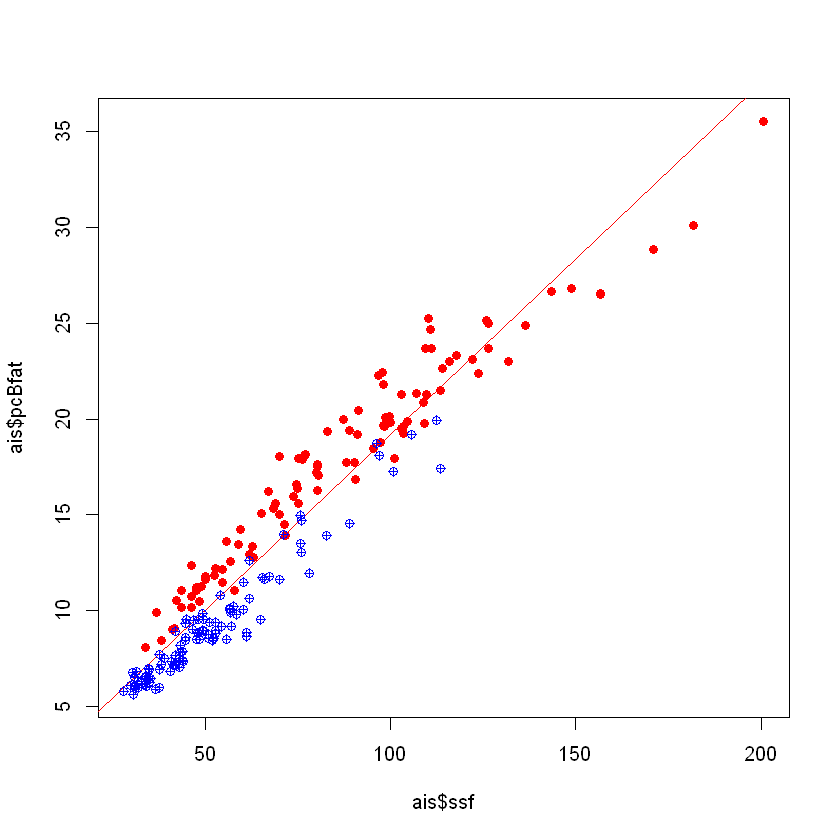

In [13]:
plot(ais$ssf, ais$pcBfat)
abline(lm(ais$pcBfat ~ ais$ssf), col = "red")
mujeres <- which(ais$sex == "f")
points(ais$ssf[mujeres], ais$pcBfat[mujeres], col = "#ff0000", pch = 16)
points(ais$ssf[-mujeres], ais$pcBfat[-mujeres], col = "blue", pch = 10)

In [6]:
b <- lm(ais$pcBfat ~ ais$ssf)$coefficients
b

(Intercept)     ais$ssf 
  0.8733647   0.1830445

In [16]:
lm_obj <- lm(ais$pcBfat ~ ais$ssf)
summary(lm_obj) # Resumen estadístico


Call:
lm(formula = ais$pcBfat ~ ais$ssf)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2389 -1.1305 -0.2132  1.0160  4.3718 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.873365   0.276252   3.161  0.00181 ** 
ais$ssf     0.183045   0.003621  50.546  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.672 on 200 degrees of freedom
Multiple R-squared:  0.9274,	Adjusted R-squared:  0.927 
F-statistic:  2555 on 1 and 200 DF,  p-value: < 2.2e-16


In [17]:
confint(lm_obj) # Intervalos de confianza

2.5 %     97.5 %   
(Intercept) 0.3286242 1.4181053
ais$ssf     0.1759036 0.1901855

In [18]:
mujeres <- as.integer(ais$sex == "f")
mujeres

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [19]:
lm(ais$pcBfat ~ ais$ssf + mujeres)


Call:
lm(formula = ais$pcBfat ~ ais$ssf + mujeres)

Coefficients:
(Intercept)      ais$ssf      mujeres  
     1.1307       0.1579       2.9844  


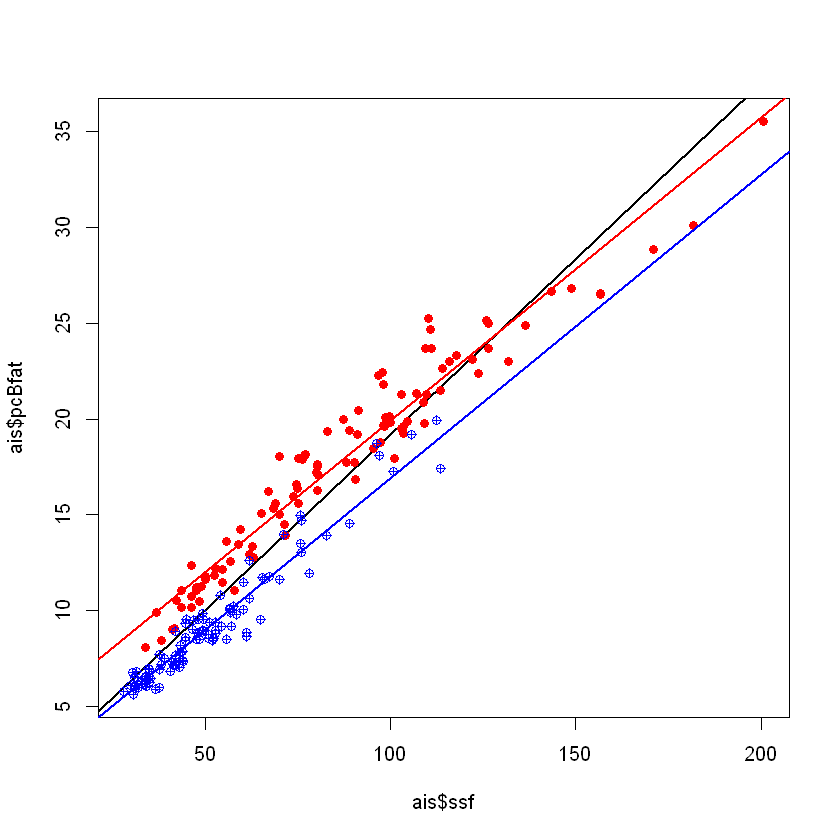

In [23]:
plot(ais$ssf, ais$pcBfat)
abline(lm(ais$pcBfat ~ ais$ssf), col = "black", lw = 2)
mujeres <- which(ais$sex == "f")
points(ais$ssf[mujeres], ais$pcBfat[mujeres], col = "#ff0000", pch = 16)
points(ais$ssf[-mujeres], ais$pcBfat[-mujeres], col = "blue", pch = 10)
abline(a = 1.1307, b = 0.1579, col = "blue", lw = 2)
abline(a = 4.1151, b = 0.1579, col = "red", lw = 2)

### **Tarea: Implementar el cálculo de los estimadores**
$$\hat{\mathbf{\beta}}$$